# Name: Yiming Gao
## Exercise 1

Crunch the data and tell us whether our return rate is trending up or down. 

In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("XLS_takehome.xlsx")

Let's first have a look at what the data looks like (first 5 rows).

In [3]:
df.head()

,dateordered,datereturned,orderstatus,orders
0,2016-12-31,2017-01-24,returned,1
1,2016-12-31,NaT,complete,8
2,2016-12-30,NaT,complete,14
3,2016-12-29,NaT,complete,14
4,2016-12-28,2016-12-29,returned,1


### Exploratory Data Analysis

Since we want to measure the metrics by month, I extracted the **`month_ordered`** and **`month_returned`** as two separate columns. Meanwhile, I calculated the difference between `dateordered` and `datereturned`, for future analysis purpose.

In [4]:
# Add month column to aggregate by month
df['month_ordered'] = [d.date().month for d in df['dateordered']]
df['month_returned'] = [d.date().month for d in df['datereturned']]

# Difference between return and order data (if applicable)
df['difference'] = df['datereturned'] - df['dateordered'] 

Now the dataset looks like this (first 5 rows):

In [16]:
df

,dateordered,datereturned,orderstatus,orders,month_ordered,month_returned,difference
0,2016-12-31,2017-01-24,returned,1,12,1.0,24 days
1,2016-12-31,NaT,complete,8,12,NaN,NaT
2,2016-12-30,NaT,complete,14,12,NaN,NaT
3,2016-12-29,NaT,complete,14,12,NaN,NaT
4,2016-12-28,2016-12-29,returned,1,12,12.0,1 days
5,2016-12-28,NaT,complete,23,12,NaN,NaT
6,2016-12-27,2017-01-28,returned,1,12,1.0,32 days
7,2016-12-27,2017-01-25,returned,1,12,1.0,29 days
8,2016-12-27,2017-01-15,returned,1,12,1.0,19 days
9,2016-12-27,2017-01-05,returned,1,12,1.0,9 days


One thing to notice is that sometimes the difference can be very large (more than 90 days), which means the customer returned the product after using it for quite a long time. In such cases, I would count that into the ordered month. For example, an order was placed in August, but returned in November, then this case will be counted towards **August**.

### Return Rate
The first thing came to my mind was how the "return rate" was defined here. Usually in ecommence, no matter what you sell online – it’s the customer’s right to send it back. Our goal is to **minimize return rates**, i.e., increase the number of "happy customers".

From my understanding, 

$$Goal\longrightarrow \text{Happy customers}\le \text{good product/service} \approx \text{low return rate}$$

I first aggregrated orders (ordered/ returned) by month, and merge them together to calculate the return rate, which is $\frac{Returned}{Total}$. The following table contains the return rate from August to December. I also plot the rate rate and the number of total order placed in that month in the same graph.

In [6]:
# Get the total orders per month
temp1 = df.groupby('month_ordered')['orders'].sum()

# Get the sum of the orders per month
temp2 = df.loc[df['orderstatus'] == "returned"].groupby('month_ordered')['orders'].sum()

# Calculate return rate
new_df = pd.DataFrame({"Month": range(8, 13), 
                       "Total": temp1, 
                       "Returned": temp2,
                       "Return rate": temp2 / temp1}).reset_index(drop = True)

print(new_df)

   Month  Return rate  Returned  Total
0      8     0.067114        10    149
1      9     0.062937         9    143
2     10     0.055556        10    180
3     11     0.053097        12    226
4     12     0.048101        19    395


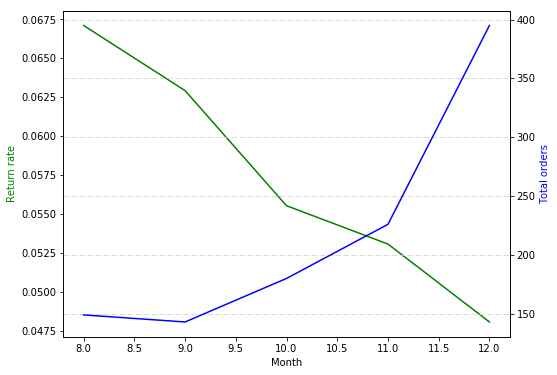

In [17]:
x = np.arange(8, 13, 1)
fig, ax1 = plt.subplots(figsize = (8, 6))
ax2 = ax1.twinx()

ax1.plot(x, new_df["Return rate"], 'g-', label = 'return rate')
ax2.plot(x, new_df["Total"], 'b-', label = 'total orders')

ax1.set_xlabel("Month")
ax1.set_ylabel("Return rate", color = "g")
ax2.set_ylabel("Total orders", color = "b")
plt.grid(color = 'lightgray', linestyle = '--')

plt.show()

It seems that if the return rate is defined in this way, the return rate went down in December. Although the number of returned orders increased, the total orders increased as well.


### Days between order and return dates
Then I inspected the difference between order date and return date if possible, we notice that 33 out of total returned orders were returned within 1 month.

In [40]:
print(df.loc[df['difference']/ np.timedelta64(1, 'D') <= 30].shape[0])
print(new_df["Returned"].sum())

33
60


Casper's products are mainly mattress, and I found from Casper website: https://casper.com/mattresses/ that customers are offered **100 days** to try it on and get a full refund. So major reasons for return orders will come from two main aspects as I will discuss later in summary.

### Further analysis with more data
Since I only got 5 months' data with around 200 rows, it's not enough to build any predictive models with it. Meanwhile, the predictor variables are not complete. For example, we can dig deeper into every single order, customer's location (state), order month, mattress size/ type, his order history, etc. Once we get these data collected, we can further analyze and predict in the following ways.

#### Logistic regression
Our response will be return (1) or not(0), predictors are some variables as I described above.


#### Time Series Analysis
Our response will be the number of returned orders, given the month and total placed orders. One thing to note is that Casper is a fast-growing startup with less than 10 years history, we might not have enough data for prediction using this method right now.

#### Other machine learning models
Similar to logistic regression, we could also try other ensemble methods such as random forest, stochastic gradient boosting, or even neural network. This is a classification problem here, so simple algorithms like knn and naive bayes could also be applied.

### Summary
As I mentioned earlier, 

$$Goal\longrightarrow \text{Happy customers}\le \text{good product/service} \approx \text{low return rate}$$

I also have some concerns regarding the return rates:

- Due to the nature of Casper's major product (mattress) and free return policy, **the cost of each return orders can be very high** because typically a mattress is very heavy.

- Since mattress is a type of durable product unlike food or beverages, which means a past customer is less common to re-order a new mattress in a short time period, unless he is sprucing the house. Ideally, he could recommend Casper's product to others.

#### 1. Results from given data.

The number of total orders remained stable from August to October, but increased significantly in November and December. Such **seasonal** increasing sales is due to Black Friday, Ciber Monday, Christmas sales, or other event-driven effects.

As we may expect, the number of returned orders increased correspondingly, however, not that much as the increasing orders, meaning the **overall return rate dropped**.

#### 2. Possible reasons

Although I didn't study marketing, I did some research online as well as the Casper website. I think there could be four main reasons:

a. The product didn't meet customer's expectations (returned within a short time)

- Incorrect size or product
- Product did not match description on website
- Problem with one specific mattress (wrinkled or stained)

b. Company shipped wrong product or size (returned within a short time)

c. Purchased during holiday season

As we may notice, the total number of orders increased especially in November and December. Gifts purchased during the holiday season are some of the most returned products across the board. 

d. Wardrobing

The customer buys mattress once to try (potentially for a long time) and has no intention of keeping them afterward. These people may not be able to afford to own the item or are taking advantage of generous return policies.

#### 3. Possible solutions
For reason a and b, we could read more reviews from customers, and extract important comments manually or through text mining (if too many reviews coming in). We might improve the mattress quality from the manufacture perspective.

Meanwhile, since Casper is an e-commence company, a well-designed interface is extremely important. A/B Testing could be helpful and it's most commonly used for improving online purchasing website.

As I mentioned before, more sophisticated machine learning models could be applied for prediction as well, as long as we have enough data.